# Generate example models for modeling class

Here just a couple of functions (and simple data conversions from gempy models) to create some models:

In [1]:
import numpy as np
from scipy.interpolate import Rbf

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from numpy.linalg import lstsq



## Layer stack

The first model we will consider is a simple layer stack of (completely) parallel layers, e.g. something we would expect to observe in a sedimentary system:

In [2]:
l1 = lambda x : 0.25*x + 10
l2 = lambda x : 0.25*x + 20
l3 = lambda x : 0.25*x + 30

### Randomly sample points

We now randomly extract a set of interface points from these lines:


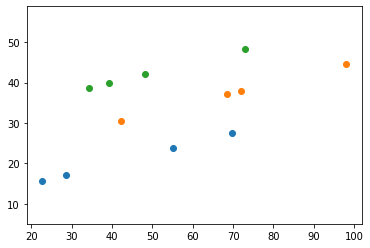

In [3]:
n_pts = 4 # Points per layer

# set seed for reproducibility
np.random.seed(123)
l1_pts_x = np.random.uniform(0,100,n_pts)
l1_pts_y = l1(l1_pts_x)
l2_pts_x = np.random.uniform(0,100,n_pts)
l2_pts_y = l2(l2_pts_x)
l3_pts_x = np.random.uniform(0,100,n_pts)
l3_pts_y = l3(l3_pts_x)


# plt.plot(xvals, l1(xvals))
# plt.plot(xvals, l2(xvals))
# plt.plot(xvals, l3(xvals))

plt.plot(l1_pts_x, l1_pts_y, 'o')
plt.plot(l2_pts_x, l2_pts_y, 'o')
plt.plot(l3_pts_x, l3_pts_y, 'o')

plt.axis('equal');

In [4]:
# combine data in arrays
x = np.hstack([l1_pts_x, l2_pts_x, l3_pts_x])
y = np.hstack([l1_pts_y, l2_pts_y, l3_pts_y])

# give points values
z = np.hstack([np.ones(n_pts)*10, np.ones(n_pts)*20, np.ones(n_pts)*30])

### Save points for further use

In [5]:
np.save("pts_line_model_x", x)
np.save("pts_line_model_y", y)
np.save("pts_line_model_z", z)

## Simple fold model

In [6]:
l1 = lambda x : 10*np.sin(0.1*x) + 10
l2 = lambda x : 10*np.sin(0.1*x) + 20
l3 = lambda x : 10*np.sin(0.1*x) + 30

(-5.0, 105.0, -1.999971452300779, 41.99999549246729)

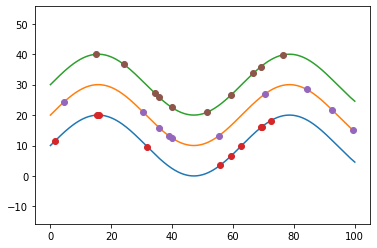

In [11]:
n_pts = 10 # Points per layer
l1_pts_x = np.random.uniform(0,100,n_pts)
l1_pts_y = l1(l1_pts_x)
l2_pts_x = np.random.uniform(0,100,n_pts)
l2_pts_y = l2(l2_pts_x)
l3_pts_x = np.random.uniform(0,100,n_pts)
l3_pts_y = l3(l3_pts_x)

xvals = np.linspace(0,100,1000)
plt.plot(xvals, l1(xvals))
plt.plot(xvals, l2(xvals))
plt.plot(xvals, l3(xvals))

plt.plot(l1_pts_x, l1_pts_y, 'o')
plt.plot(l2_pts_x, l2_pts_y, 'o')
plt.plot(l3_pts_x, l3_pts_y, 'o')

plt.axis('equal')

In [12]:
# combine data in arrays
x = np.hstack([l1_pts_x, l2_pts_x, l3_pts_x])
y = np.hstack([l1_pts_y, l2_pts_y, l3_pts_y])

# give points values
z = np.hstack([np.ones(n_pts)*10, np.ones(n_pts)*20, np.ones(n_pts)*30])

In [13]:
np.save("pts_fold_model_x", x)
np.save("pts_fold_model_y", y)
np.save("pts_fold_model_z", z)

## Recumbend fold

aka "Jan's model" - for more examples see:

https://github.com/cgre-aachen/gempy/tree/master/notebooks/examples

Note: we don't generate this model from scratch, but load the csv files and extract the relevant information

In [11]:
rock1 = np.loadtxt('jan_model3_rock1.csv', delimiter=',', skiprows=1, usecols=[0,1,2])
rock2 = np.loadtxt('jan_model3_rock2.csv', delimiter=',', skiprows=0, usecols=[0,1,2])
# select only points for y = 500
rock1 = rock1[np.where(rock1[:,1]==500)]
rock2 = rock2[np.where(rock2[:,1]==500)]

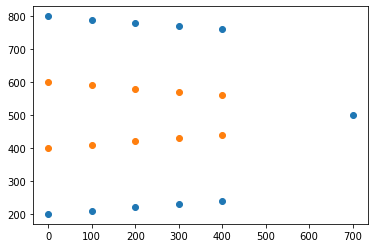

In [12]:
plt.plot(rock1[:,0], rock1[:,2], 'o')
plt.plot(rock2[:,0], rock2[:,2], 'o')

In [13]:
# combine data:
x = np.hstack([rock1[:,0], rock2[:,0]])
y = np.hstack([rock1[:,2], rock2[:,2]])
z = np.hstack([np.ones_like(rock1[:,0])*10, np.ones_like(rock2[:,0])*20])

In [14]:
np.save("pts_jans_fold_model_x", x)
np.save("pts_jans_fold_model_y", y)
np.save("pts_jans_fold_model_z", z)

## Fault model

Here also an example of a fault model, e.g. to be used to show the influence of multiple interacting scalar fields:

In [16]:
n_pts = 10 # Points per layer

# Linear functions for line data
l1 = lambda x : 0.25*x + 30
l2 = lambda x : 0.25*x + 40
l3 = lambda x : 0.25*x + 50

# set seed for reproducibility
np.random.seed(123)
# sampling points
l1_pts_x = np.random.uniform(0,90,n_pts)
l1_pts_y = l1(l1_pts_x)
l2_pts_x = np.random.uniform(0,90,n_pts)
l2_pts_y = l2(l2_pts_x)
l3_pts_x = np.random.uniform(0,90,n_pts)
l3_pts_y = l3(l3_pts_x)

In [24]:
# define fault
fault_point_1 = (40,60)
fault_point_2 = (60,20)
# interpolate fault - to obtain offset for data set:

In [25]:
x_coords, y_coords = [40,60], [60,20] # zip(*points)
A = np.vstack([x_coords, np.ones(len(x_coords))]).T
m, c = lstsq(A, y_coords, rcond=None)[0]

In [26]:
offset = 10 # offset of block on right side of fault
f = lambda x : m*x + c

# Create filters to determine points on each side of fault
filter_l1 = f(l1_pts_x) < l1_pts_y
filter_l2 = f(l2_pts_x) < l2_pts_y
filter_l3 = f(l3_pts_x) < l3_pts_y

# create copies of arrays to avoid confusion...
l1_pts_x_fault = l1_pts_x.copy()
l1_pts_y_fault = l1_pts_y.copy()
l2_pts_x_fault = l2_pts_x.copy()
l2_pts_y_fault = l2_pts_y.copy()
l3_pts_x_fault = l3_pts_x.copy()
l3_pts_y_fault = l3_pts_y.copy()

# Adjust y-values
l1_pts_y_fault[filter_l1] -= offset
l2_pts_y_fault[filter_l2] -= offset
l3_pts_y_fault[filter_l3] -= offset
# Adjust x-values
l1_pts_x_fault[filter_l1] -= 1/m*offset
l2_pts_x_fault[filter_l2] -= 1/m*offset
l3_pts_x_fault[filter_l3] -= 1/m*offset

## Adding noise

Of course, all of the previous examples are just too perfect to be realistic geological observations - let's add some noise to test the sensitivity of the algorithms:

*Note: we only add noise to the y-component*

In [27]:
y = np.load("pts_line_model_y.npy")

In [31]:
y += np.random.normal(0, 2, len(y))

In [32]:
np.save("pts_line_model_y_noise", y)